In [566]:
# import the needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR

## Data pre-processing

In [567]:
# load the data

data = pd.read_csv("coffee-prices-historical-chart-data.csv")

In [568]:
# A short glance at the data 

data.head()

,date,value
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660


In [569]:
# transform the dates to ordinal values

data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].apply(dt.toordinal)

In [570]:
# set Independent Variable (feature) and Dependent Variable

X = data['date'].values
Y = data['value'].values
X = np.reshape(X, (-1, 1))
Y = np.reshape(Y, (-1, 1))

In [571]:
# fill missing values

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(Y)
Y = imputer.transform(Y)

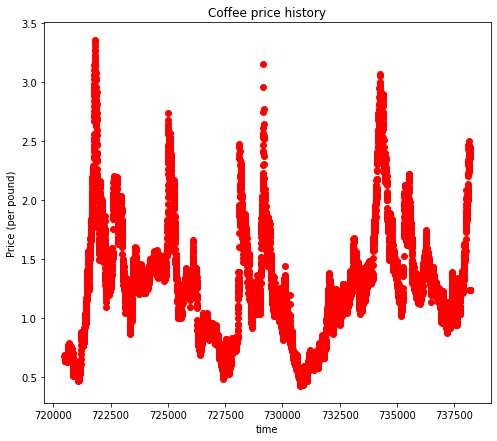

In [572]:
# A glance at the data 

plt.figure(figsize=(8,7))
plt.scatter(X, Y, color='red')
plt.title('Coffee price history')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [573]:
# split the data to train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

## Simple Linear Regression

In [574]:
# train the Linear Regrssion model

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [575]:
# make prediction with Linear Regrssion

y_pred = lr_reg.predict(X_test)

In [576]:
# Linear Regression Coeficient and intercept values

print("Coef: {}".format(lr_reg.coef_))
print("Intercept:  {}".format(lr_reg.intercept_))

Coef: [[2.47705848e-06]]
Intercept:  [-0.53427439]


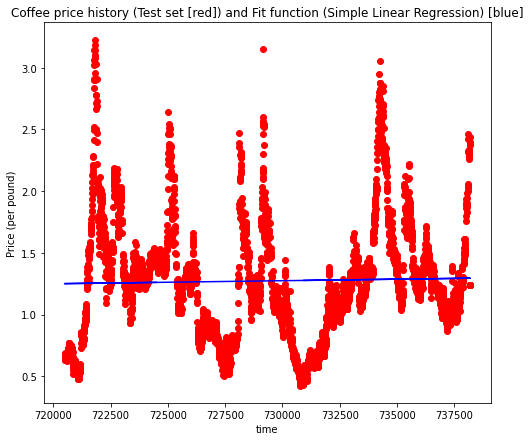

In [577]:
# A glance at the data and fit line

plt.figure(figsize=(8,7))
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, lr_reg.predict(X_train), color="blue")
plt.title('Coffee price history (Test set [red]) and Fit function (Simple Linear Regression) [blue]')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [578]:
# R2 core for Simple Linear Regression

print("R2_score for Simple Linear Regression:  {}".format(r2_score(y_test, y_pred)))

R2_score for Simple Linear Regression:  0.0003317114344260075


## Polynomial Linear Regression

In [579]:
# create Polynimial feature 

poly_feature = PolynomialFeatures(degree=4)
X_poly = poly_feature.fit_transform(X)

In [580]:
# split train and test

X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=1/3, random_state=0)

In [581]:
# fit the model

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

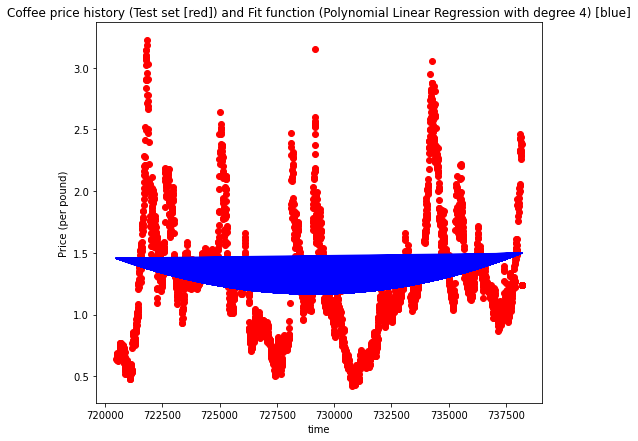

In [582]:
# A glance at the data and fit function

plt.figure(figsize=(8,7))
plt.scatter(X_test[:, 1], y_test, color="red")
plt.plot(X_train[:, 1], poly_model.predict(X_train), color="blue")
plt.title('Coffee price history (Test set [red]) and Fit function (Polynomial Linear Regression with degree 4) [blue]')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [583]:
# R2 core for Polynomial Linear Regression

y_pred = poly_model.predict(X_test)
print("R2_score for Polynomial Linear Regression:  {}".format(r2_score(y_test, y_pred)))

R2_score for Polynomial Linear Regression:  0.03759745234500955


## Support Vector Regressor 

In [584]:
# Feature scaling. The reason is values (prices) are small compare to ordinal times.

sc_x = StandardScaler()
sc_y = StandardScaler()
X_fs = sc_x.fit_transform(X)
Y_fs = sc_y.fit_transform(Y)

In [585]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X_fs, Y_fs, test_size=1/3, random_state=0)

In [586]:
# Support Vectore Regrssion Model

svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

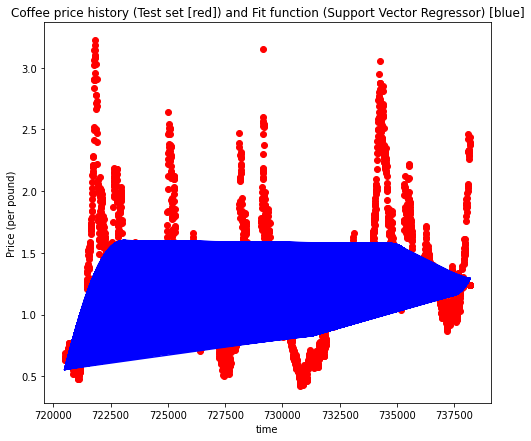

In [587]:
# A glance at the data and fit function

plt.figure(figsize=(8,7))
plt.scatter(sc_x.inverse_transform(X_test), sc_y.inverse_transform(y_test), color="red")
plt.plot(sc_x.inverse_transform(X_train), sc_y.inverse_transform(svr_regressor.predict(X_train).reshape(-1, 1)), color="blue")
plt.title('Coffee price history (Test set [red]) and Fit function (Support Vector Regressor) [blue]')
plt.xlabel('time')
plt.ylabel('Price (per pound)')
plt.show()

In [588]:
# R2 core for Support Vector Regressor

y_pred = svr_regressor.predict(X_test).reshape(-1, 1)
print("R2_score for Support Vector Regression:  {}".format(r2_score(y_test, y_pred)) )

R2_score for Support Vector Regression:  0.3758013144929312


## Decision Tree